In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_detail = pd.read_pickle('df_detail.plk')
df_final = pd.read_pickle('df_final.plk')
df = pd.read_pickle('df.plk')
print ( df.shape, df_final.shape)
df_final.head()

(109337, 5) (109337, 1210)


,f_analisis,id,segmento,train,var_rpta,canal_CANAL_5_cantidad_sesiones,canal_CANAL_2_cantidad_sesiones,canal_CANAL_6_cantidad_sesiones,canal_CANAL_8_cantidad_sesiones,canal_CANAL_3_cantidad_sesiones,...,day_27_cantidad_sesiones,day_28_cantidad_sesiones,day_29_cantidad_sesiones,day_30_cantidad_sesiones,day_31_cantidad_sesiones,day_4_cantidad_sesiones,day_11_cantidad_sesiones,day_15_cantidad_sesiones,day_17_cantidad_sesiones,day_23_cantidad_sesiones
0,201803,1,4,1,0.0,69.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0
1,201604,2,0,1,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,201608,3,5,1,0.0,0.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,201706,4,4,1,0.0,618.0,0.0,1.0,0.0,0.0,...,12.0,23.0,24.0,16.0,14.0,20.0,15.0,20.0,15.0,14.0
4,201703,5,4,1,0.0,70.0,1.0,46.0,2.0,0.0,...,3.0,4.0,1.0,3.0,2.0,4.0,5.0,12.0,3.0,5.0


## EDA Inicial

In [ ]:
df_eda = df[df['train'] == 1]
df_eda['f_analisis'] = df_eda['f_analisis'].astype(str)
df_eda['year'] = [ value[:4] for value in df_eda['f_analisis']]
df_eda['year'] = df_eda['year'].astype(int)
df_eda['month'] = [ value[4:] for value in df_eda['f_analisis'] ]
df_eda['month'] = df_eda['month'].astype(int)
df_eda.fillna(0, inplace=True)
profile = df_eda.profile_report(title='BancolombiaEDA')
profile.to_file(output_file="bancolombiaEDA.html")

### Importancia de las variables para obtener importancia

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBClassifier

In [4]:
df_final_ = df_final[df_final['train'] == 1]

In [5]:
X = df_final_.drop(["var_rpta",'id','f_analisis','train'],axis=1)
y = df_final_['var_rpta']

In [6]:
X.head()

,segmento,canal_CANAL_5_cantidad_sesiones,canal_CANAL_2_cantidad_sesiones,canal_CANAL_6_cantidad_sesiones,canal_CANAL_8_cantidad_sesiones,canal_CANAL_3_cantidad_sesiones,canal_CANAL_1_cantidad_sesiones,canal_CANAL_4_cantidad_sesiones,canal_CANAL_7_cantidad_sesiones,disposit_DISPOSIT_4_cantidad_sesiones,...,day_27_cantidad_sesiones,day_28_cantidad_sesiones,day_29_cantidad_sesiones,day_30_cantidad_sesiones,day_31_cantidad_sesiones,day_4_cantidad_sesiones,day_11_cantidad_sesiones,day_15_cantidad_sesiones,day_17_cantidad_sesiones,day_23_cantidad_sesiones
0,4,69.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,...,2.0,2.0,2.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,618.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,618.0,...,12.0,23.0,24.0,16.0,14.0,20.0,15.0,20.0,15.0,14.0
4,4,70.0,1.0,46.0,2.0,0.0,0.0,0.0,0.0,70.0,...,3.0,4.0,1.0,3.0,2.0,4.0,5.0,12.0,3.0,5.0


In [7]:
#Estandarizando los datos
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y,shuffle=False,test_size=0.2)

## Importancia de las variables

In [8]:
model = XGBClassifier(
    learning_rate =0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=4,
    scale_pos_weight=2,
    seed=27)
model.fit(X_sc,y)
score_train = model.score(X_train,y_train)
score_test = model.score(X_test,y_test)
print("Score train is: {} and Score test is {}".format(score_train, score_test))

Score train is: 0.9312896060625857 and Score test is 0.9318003658217925


In [9]:
#Mirando las variables explicativas
predictors = X.columns
features = list(zip(predictors,model.feature_importances_))
variables = pd.DataFrame(np.array(features).reshape(X.shape[1],2), columns = ["Variable","Peso"])
variables['Peso'] = variables['Peso'].astype(float)
variables.sort_values(["Peso"], ascending=False, inplace=True)
variables

,Variable,Peso
1139,segmento_5,0.029998
1140,segmento_6,0.023864
0,segmento,0.021096
1138,segmento_4,0.014632
1136,segmento_2,0.010582
...,...,...
491,descrip_trxn_Regeneracion De Clave Fiduciaria_...,0.000000
492,descrip_trxn_Contraorden De Cheques_cantidad_s...,0.000000
493,descrip_trxn_Contraordenes De Cheques_cantidad...,0.000000
494,descrip_trxn_Consulta Incentivos Tarjetas De C...,0.000000


In [10]:
variables_ = list(variables[variables['Peso'] > 0.005]['Variable'].values)
df_final = df_final[variables_]
df_final = pd.concat([df[['id','var_rpta','train']].reset_index(drop=True), df_final], axis=1)
print(df_final.shape)
df_final.head()

(109337, 24)


,id,var_rpta,train,segmento_5,segmento_6,segmento,segmento_4,segmento_2,descrip_trxn_Consulta De Saldos Tarjetas APP_cantidad_sesiones,descrip_trxn_Activacion Tarjetas De Credito_cantidad_sesiones,...,grupo_modifcado_Compras_cantidad_sesiones,descrip_trxn_Consulta De Movimiento Tarjeta De Credito_cantidad_sesiones,dayofweek_1_cantidad_sesiones,descrip_trxn_Consulta Movimientos Cuentas Deposito_cantidad_sesiones,grupo_descrp_trxn_Validacion OTP_cantidad_sesiones,culpa_banco_NO_cantidad_sesiones,descrip_trxn_Consulta De Saldos De Cuentas En Tiempo Real_cantidad_sesiones,descrip_trxn_Transferencia De Fondos Desde Cuenta De Ahorros A Inversion Fiduciaria_cantidad_sesiones,grupo_modifcado_Activaciones_cantidad_sesiones,descrip_trxn_Inscripcion De Empresas Al Servicio_cantidad_sesiones
0,1,0.0,1,0,0,4,1,0,0.0,0.0,...,0.0,0.0,13.0,26.0,0.0,31.0,27.0,0.0,0.0,0.0
1,2,0.0,1,0,1,0,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,3,0.0,1,1,0,5,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0.0,1,0,0,4,1,0,0.0,0.0,...,0.0,0.0,105.0,165.0,0.0,192.0,165.0,0.0,0.0,0.0
4,5,0.0,1,0,0,4,1,0,4.0,0.0,...,2.0,3.0,20.0,38.0,0.0,54.0,38.0,0.0,0.0,0.0


### EDA Final

In [16]:
df_final = df_final[df_final['train'] == 1]

In [18]:
import pandas_profiling
profile = df_final.profile_report(title='BancolombiaEDAFinal')
profile.to_file(output_file="bancolombiaEDAfinal.html")

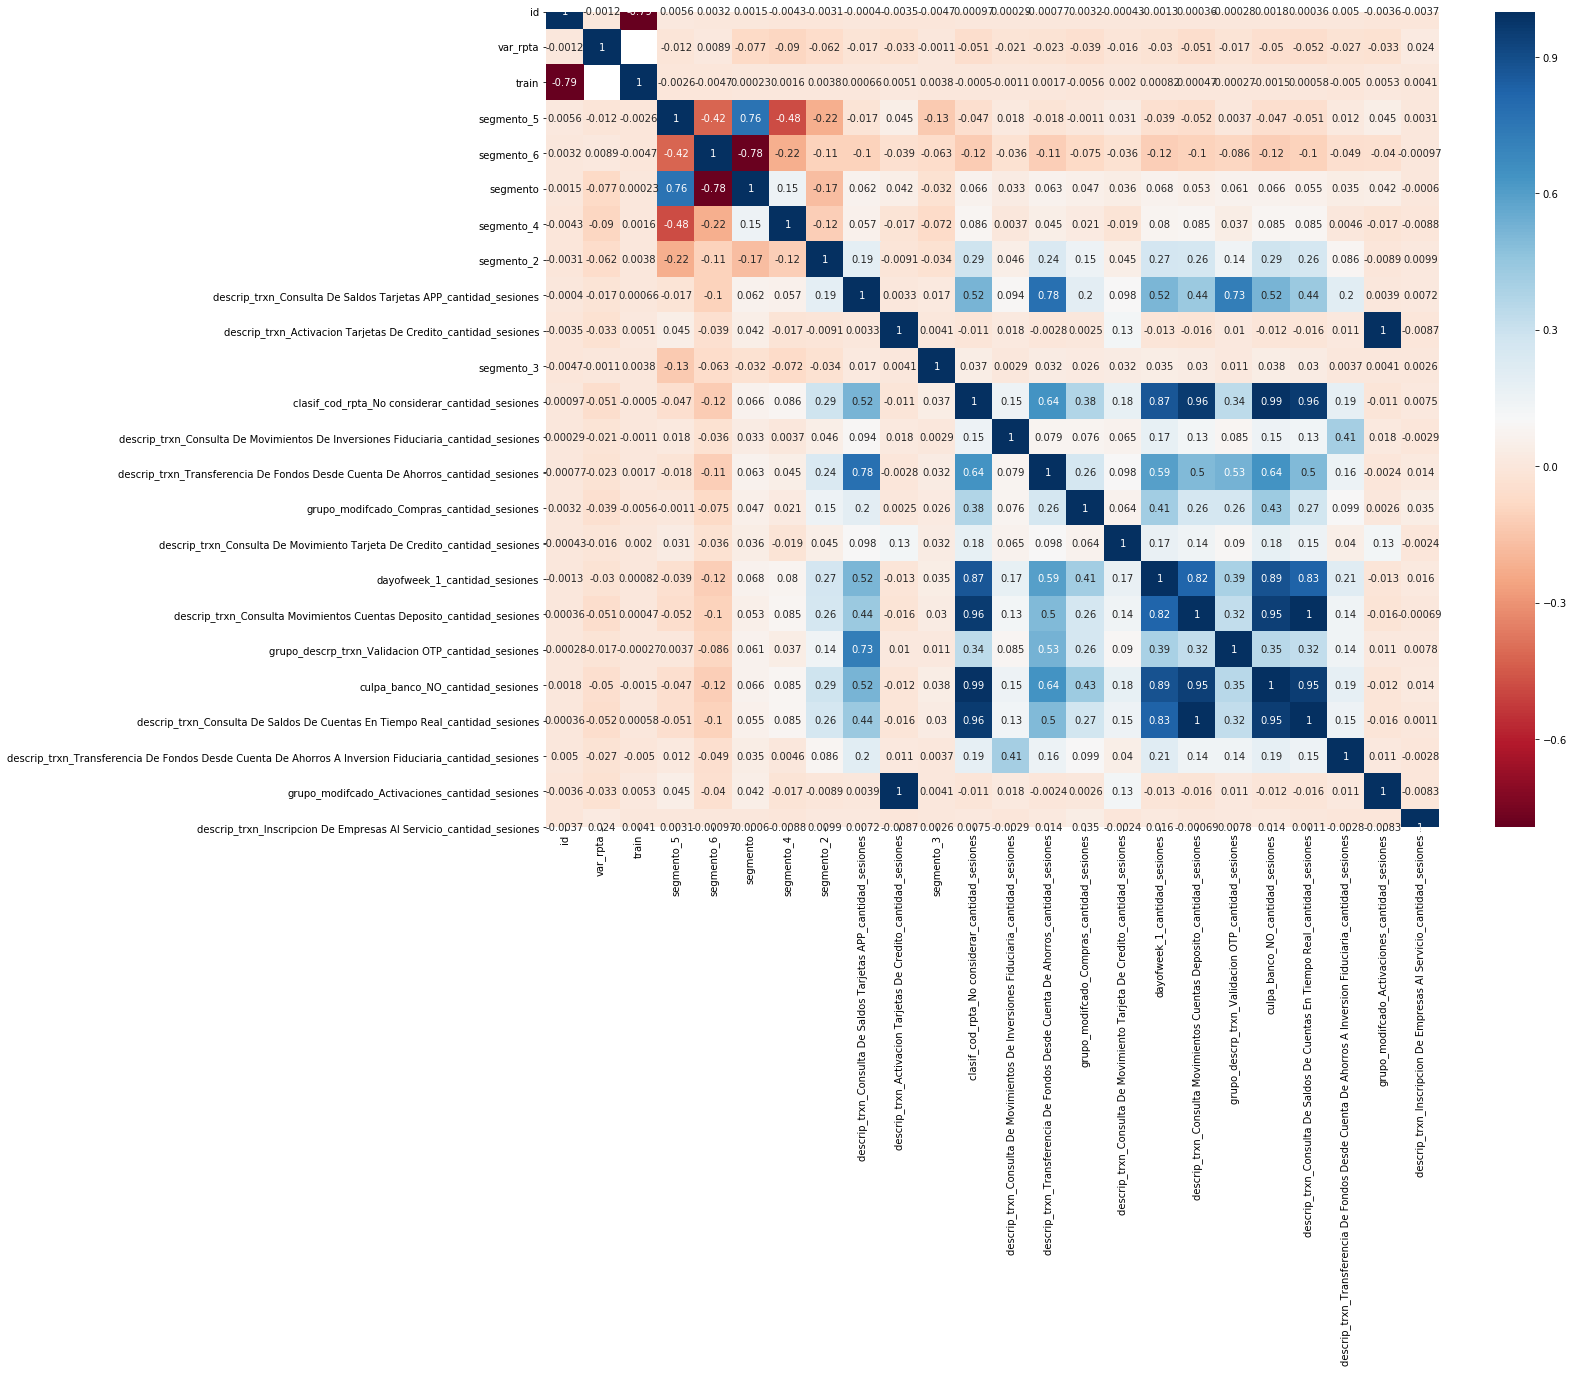

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(20,15))
sns.heatmap(df_final.corr(), cmap="RdBu", annot=True)
plt.show()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1306: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()
/home/ubuntu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/ubuntu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


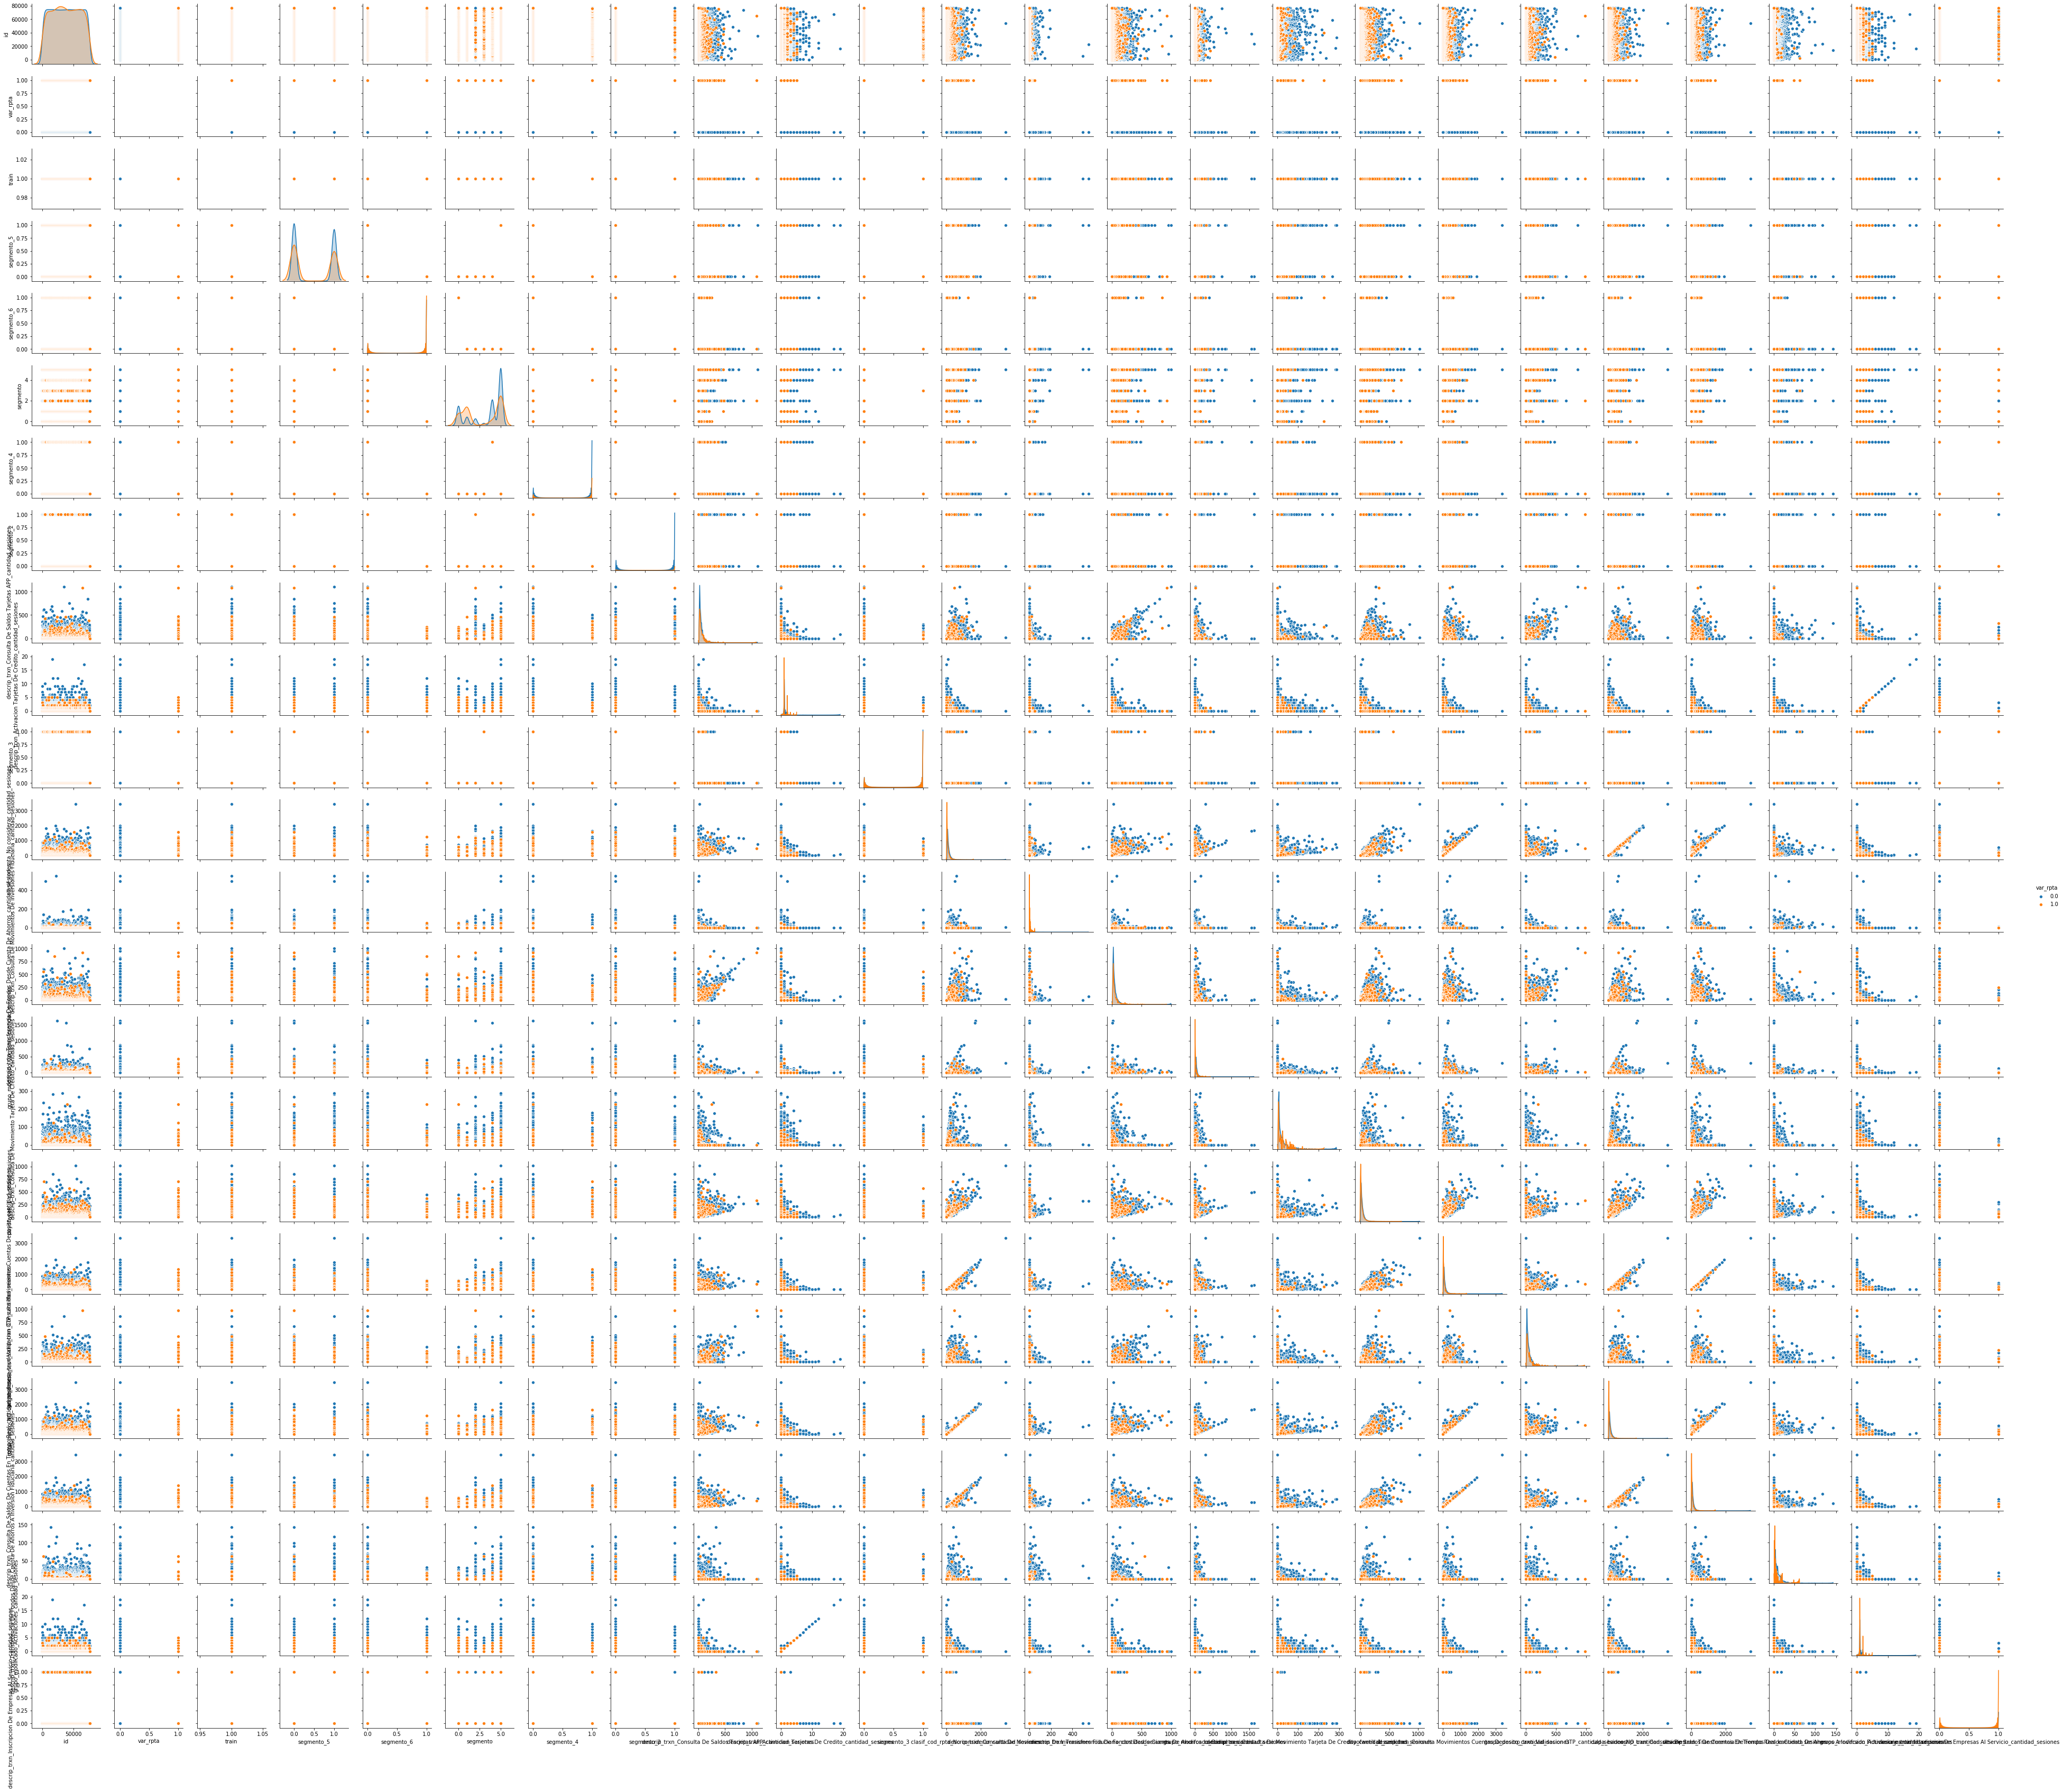

In [13]:
sns.pairplot(df_final, hue='var_rpta')